In [1]:
import os
import numpy as np
import pandas as pd
import re
import tools as tl

## Overview of model runs

In [2]:
topDirectory = "./output/15x15"#os.getcwd()
files = [path+'/'+file for path, d, f 
         in os.walk(topDirectory) 
         for file in f if file.endswith(".csv")]
overviewOfRuns = pd.concat([pd.DataFrame([np.array(re.split('[a-z-/.]+',files[n])[1:-1])]) 
           for n in range(0,len(files))])
overviewOfRuns.columns = ['Rows', 'Columns', 'Grid Option', 'Grazing',
                  'Initial Coral Percent', 'Initial Macroalgae Percent',
                      'r', 'd', 'a', 'y', 'Time', 'Record Rate', 'Number of Simulations']
overviewOfRuns = overviewOfRuns.set_index([pd.Series([n for n in range(0,len(files))])])
overviewOfRuns

,Rows,Columns,Grid Option,Grazing,Initial Coral Percent,Initial Macroalgae Percent,r,d,a,y,Time,Record Rate,Number of Simulations
0,15,15,0,80,33,33,10,40,20,75,5010,500,100
1,15,15,0,60,33,33,10,40,20,75,5010,500,100
2,15,15,0,50,33,33,10,40,20,75,5010,500,100
3,15,15,0,40,33,33,10,40,20,75,5010,500,100
4,15,15,0,40,33,33,10,40,20,75,500,90,10
5,15,15,0,70,33,33,10,40,20,75,5010,500,100
6,15,15,0,30,33,33,10,40,20,75,5010,500,100


## Choose Runs to Explore

In [17]:
filesOfInterest = [0,2,6]  ## e.g. [2,3,6] -> will pull simulations with corresponding index in table above

In [18]:
## will rewrite this list comprehension to make it neater
coralData = pd.concat([pd.DataFrame(pd.read_csv(files[f])).assign(File = np.repeat(f, len(pd.read_csv(files[f])))) 
                       for f in filesOfInterest])

In [19]:
coralData

,Simulation,Timestep,CoralCount,TurfCount,MacroalgaeCount,Coral-CoralNeighbors,Turf-TurfNeighbors,Macro-MacroNeighbors,CoralPatchCount,AlgaePatchCount,TurfPatchCount,MacroPatchCount,File
0,0,0,73,73,79,0.35,0.32,0.35,11,2,14,12,0
1,0,500,157,68,0,0.71,0.32,0.00,1,13,13,1,0
2,0,1000,167,58,0,0.77,0.35,0.00,2,10,10,1,0
3,0,1500,171,54,0,0.77,0.30,0.00,1,19,19,1,0
4,0,2000,159,66,0,0.72,0.34,0.00,2,11,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,99,3000,0,44,181,0.00,0.20,0.81,1,1,21,1,6
1096,99,3500,0,42,183,0.00,0.20,0.81,1,1,17,1,6
1097,99,4000,0,57,168,0.00,0.29,0.75,1,1,15,1,6
1098,99,4500,0,46,179,0.00,0.23,0.81,1,1,16,1,6


## Plot chosen Runs

### Coral Node Count v Time, Ordered by Model Runs

File
0    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
6    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

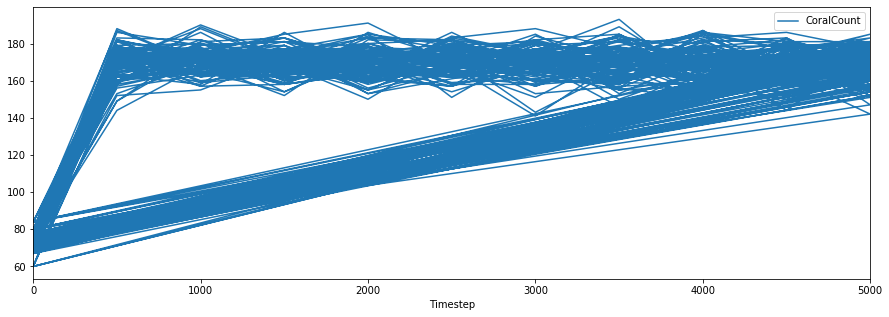

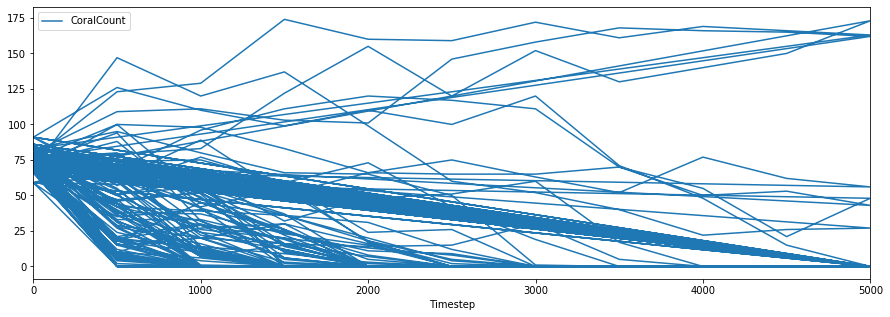

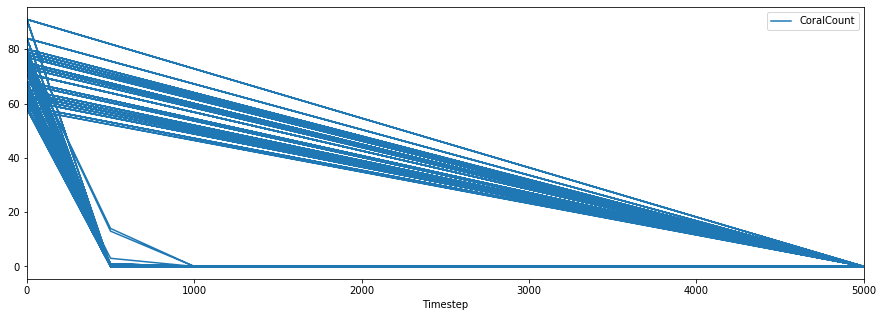

In [35]:
coralData.groupby(['File']).plot(x='Timestep', y='CoralCount',figsize=(15,5))

### Count v Coral Node Count, Ordered by Model Runs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a21d0fb70>,
      dtype=object)

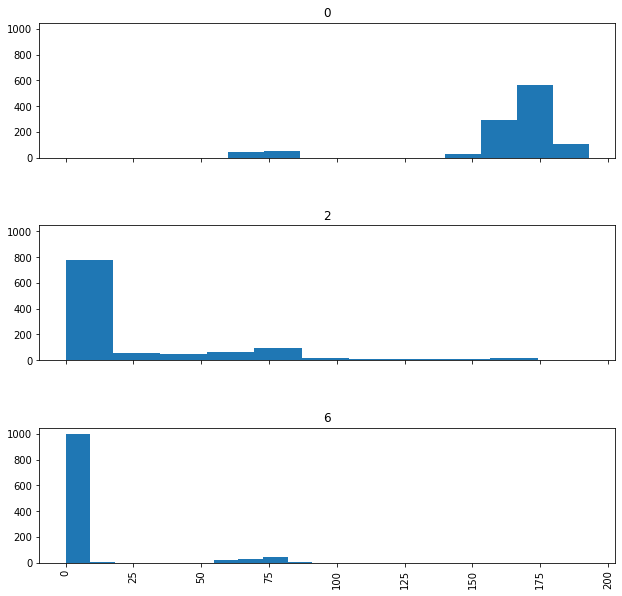

In [21]:
coralData.hist(column='CoralCount', by='File', figsize=(10,10), layout=(len(filesOfInterest),1), sharex=True, sharey=True)

### Coral-Coral Neighbors v Coral Patch Count

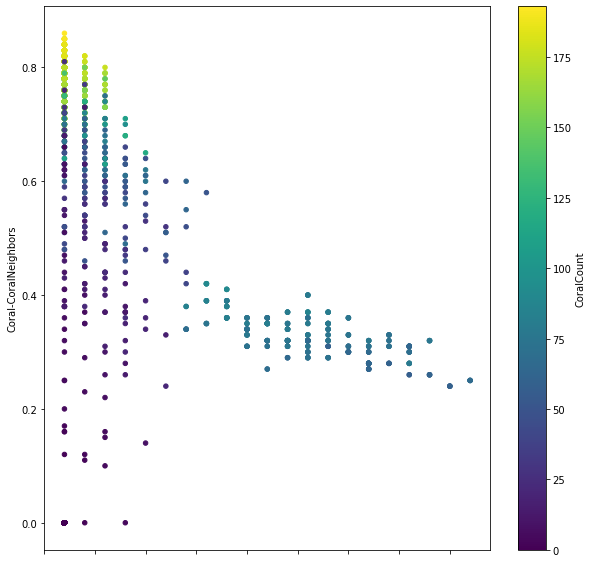

In [20]:
coralData.plot.scatter(x= 'CoralPatchCount', y='Coral-CoralNeighbors', c='CoralCount', colormap='viridis', figsize=(10,10))